In [377]:
# pandas for df structures and operations for manipulating numerical tables and time series
import pandas
from pandas.plotting import scatter_matrix


# matplotlib.pyplot for df plots
import matplotlib.pyplot as plt

# sklearn for machine learning methods
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats
from scipy.stats import zscore


# for numeric calculations
import numpy as np

# from utilities import visualize_classifier
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.metrics import r2_score

import seaborn as sns

In [378]:
df = pandas.read_csv("HR-Employee-Attrition.csv")

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [380]:
print(df.shape)

(1470, 35)


In [381]:
list(df)

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [382]:
print(df.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [384]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [385]:
df[df.notnull()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [386]:
df = df.dropna()

Were gonna check if the column Over18 is usefull. Sut den

In [387]:
print(df['Over18'].unique())

['Y']


In [388]:
df.drop(['Over18'], axis=1, inplace=True)

In [389]:
object_cols = df.select_dtypes(include='object').columns

# Dictionary to store the mappings for reporting
mapping_report = {}

# Replace categorical values with numeric codes
for col in object_cols:
    unique_vals = df[col].unique()
    val_to_code = {val: code for code, val in enumerate(unique_vals)}
    df[col] = df[col].map(val_to_code)
    mapping_report[col] = val_to_code

for col in mapping_report:
    print(f"\nColumn: {col}")
    for k, v in mapping_report[col].items():
        print(f"  '{k}' → {v}")



Column: Attrition
  'Yes' → 0
  'No' → 1

Column: BusinessTravel
  'Travel_Rarely' → 0
  'Travel_Frequently' → 1
  'Non-Travel' → 2

Column: Department
  'Sales' → 0
  'Research & Development' → 1
  'Human Resources' → 2

Column: EducationField
  'Life Sciences' → 0
  'Other' → 1
  'Medical' → 2
  'Marketing' → 3
  'Technical Degree' → 4
  'Human Resources' → 5

Column: Gender
  'Female' → 0
  'Male' → 1

Column: JobRole
  'Sales Executive' → 0
  'Research Scientist' → 1
  'Laboratory Technician' → 2
  'Manufacturing Director' → 3
  'Healthcare Representative' → 4
  'Manager' → 5
  'Sales Representative' → 6
  'Research Director' → 7
  'Human Resources' → 8

Column: MaritalStatus
  'Single' → 0
  'Married' → 1
  'Divorced' → 2

Column: OverTime
  'Yes' → 0
  'No' → 1


Rows before outlier removal: 1470
Rows after outlier removal:  1074
Total rows removed:          396

Rows removed per column:
  MonthlyIncome: 114
  TotalWorkingYears: 61
  YearsAtCompany: 27
  YearsSinceLastPromotion: 141
  NumCompaniesWorked: 39
  DistanceFromHome: 0
  JobLevel: 14


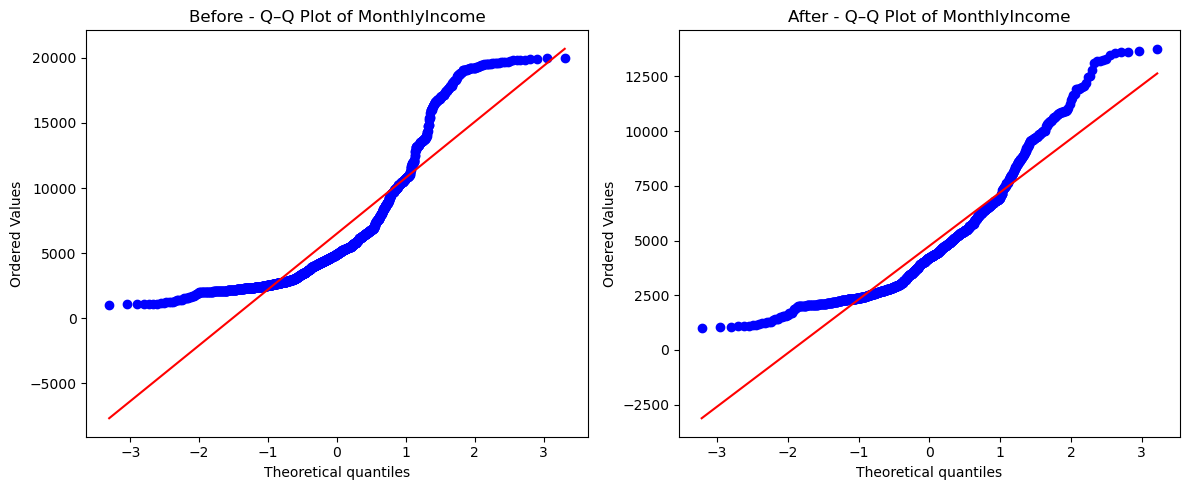

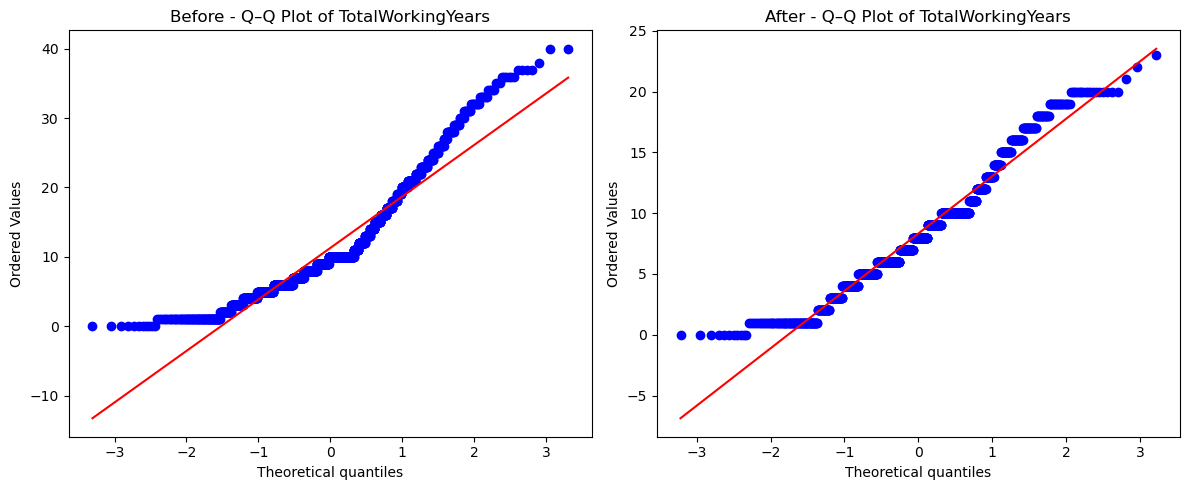

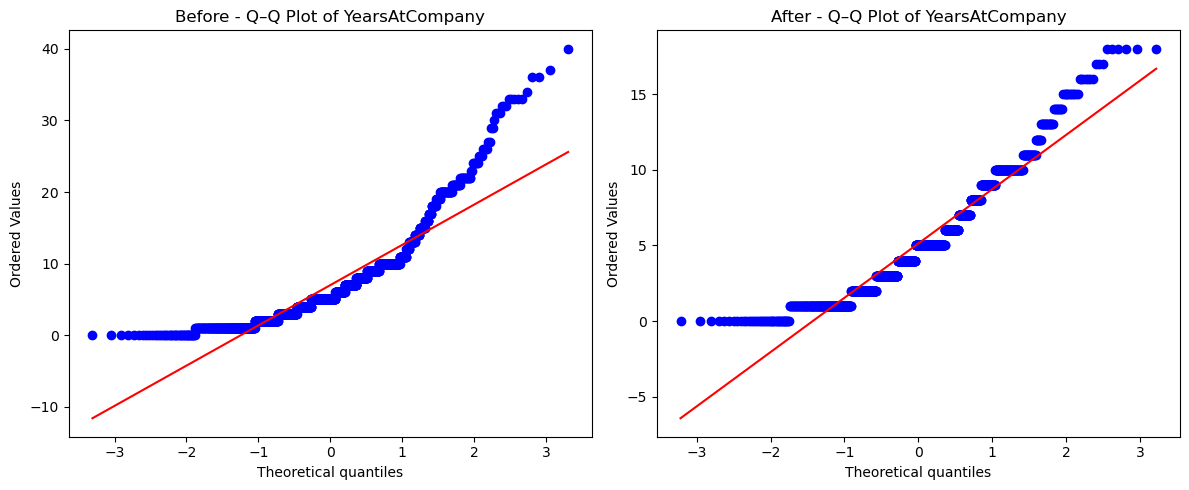

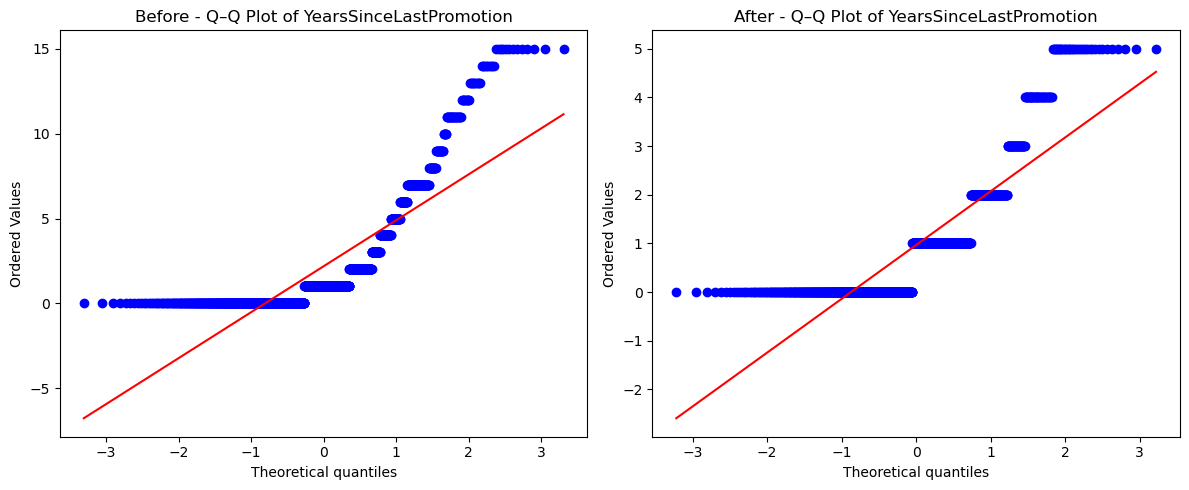

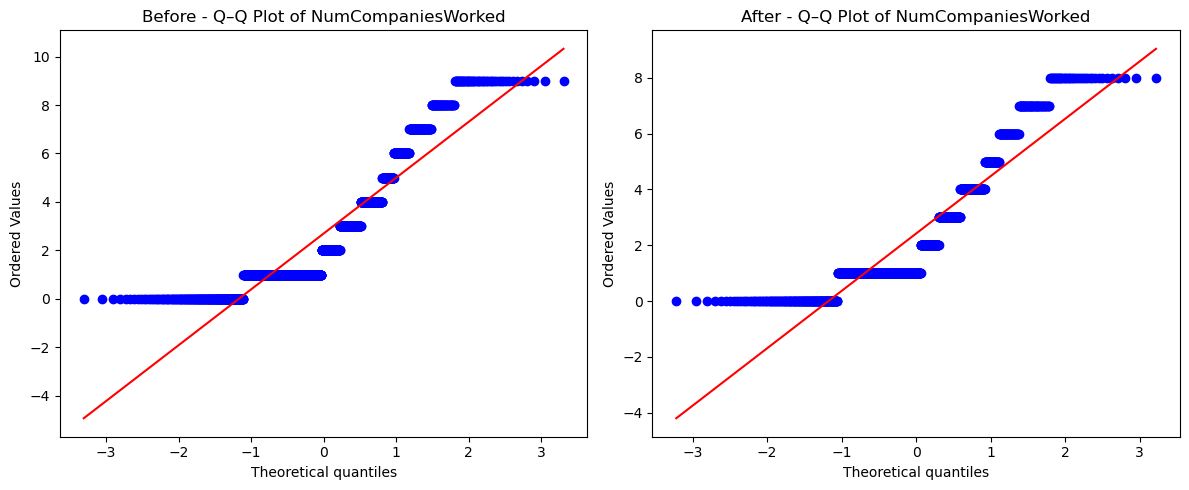

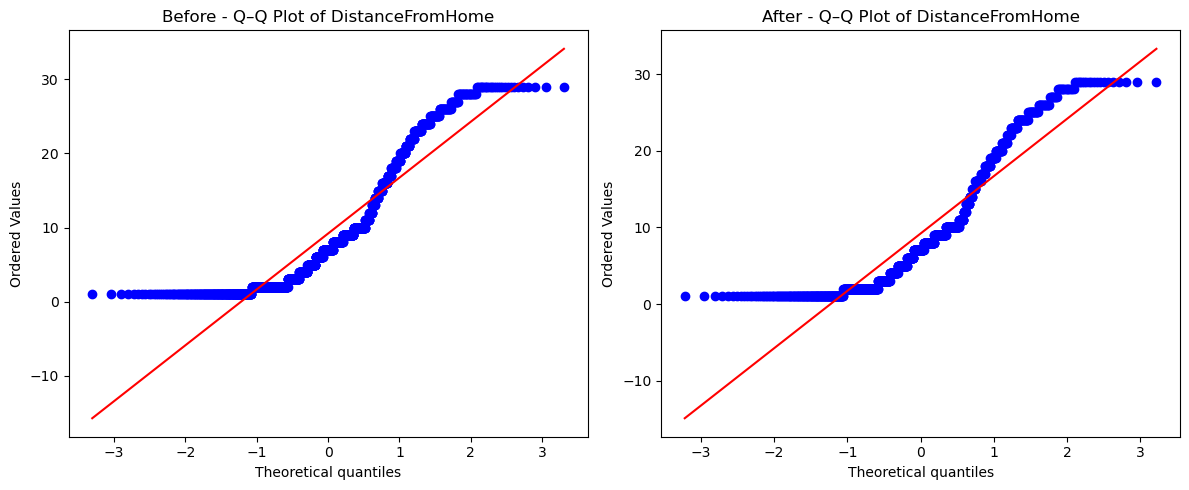

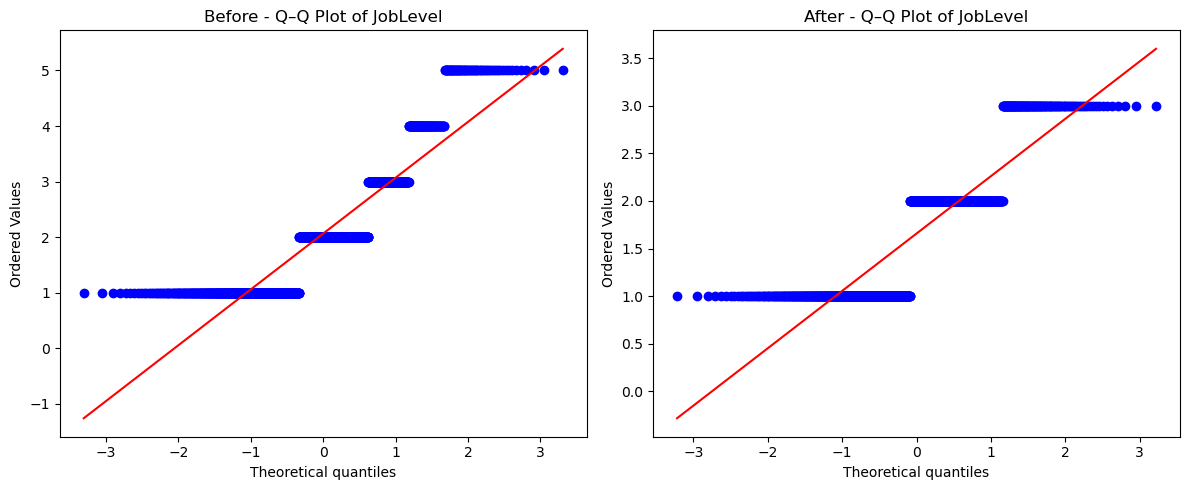

In [390]:
# Columns to apply outlier removal on (skewed numeric columns)
skewed_cols = [
    'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany',
    'YearsSinceLastPromotion', 'NumCompaniesWorked',
    'DistanceFromHome', 'JobLevel'
]

# Keep a copy of original df for plotting before/after
df_before = df.copy()

rows_before = len(df)
print(f"Rows before outlier removal: {rows_before}")

removed_per_column = {}

for col in skewed_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Identify outliers in current df
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    removed_per_column[col] = len(outliers)
    
    # Filter out outliers for this column
    df = df[(df[col] >= lower) & (df[col] <= upper)]

rows_after = len(df)
total_removed = rows_before - rows_after

print(f"Rows after outlier removal:  {rows_after}")
print(f"Total rows removed:          {total_removed}")
print("\nRows removed per column:")
for col, count in removed_per_column.items():
    print(f"  {col}: {count}")

# Q–Q plots to visually confirm improvement for each column
for col in skewed_cols:
    plt.figure(figsize=(12, 5))

    # Before outlier removal
    plt.subplot(1, 2, 1)
    stats.probplot(df_before[col], dist="norm", plot=plt)
    plt.title(f"Before - Q–Q Plot of {col}")

    # After outlier removal
    plt.subplot(1, 2, 2)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"After - Q–Q Plot of {col}")

    plt.tight_layout()
    plt.show()


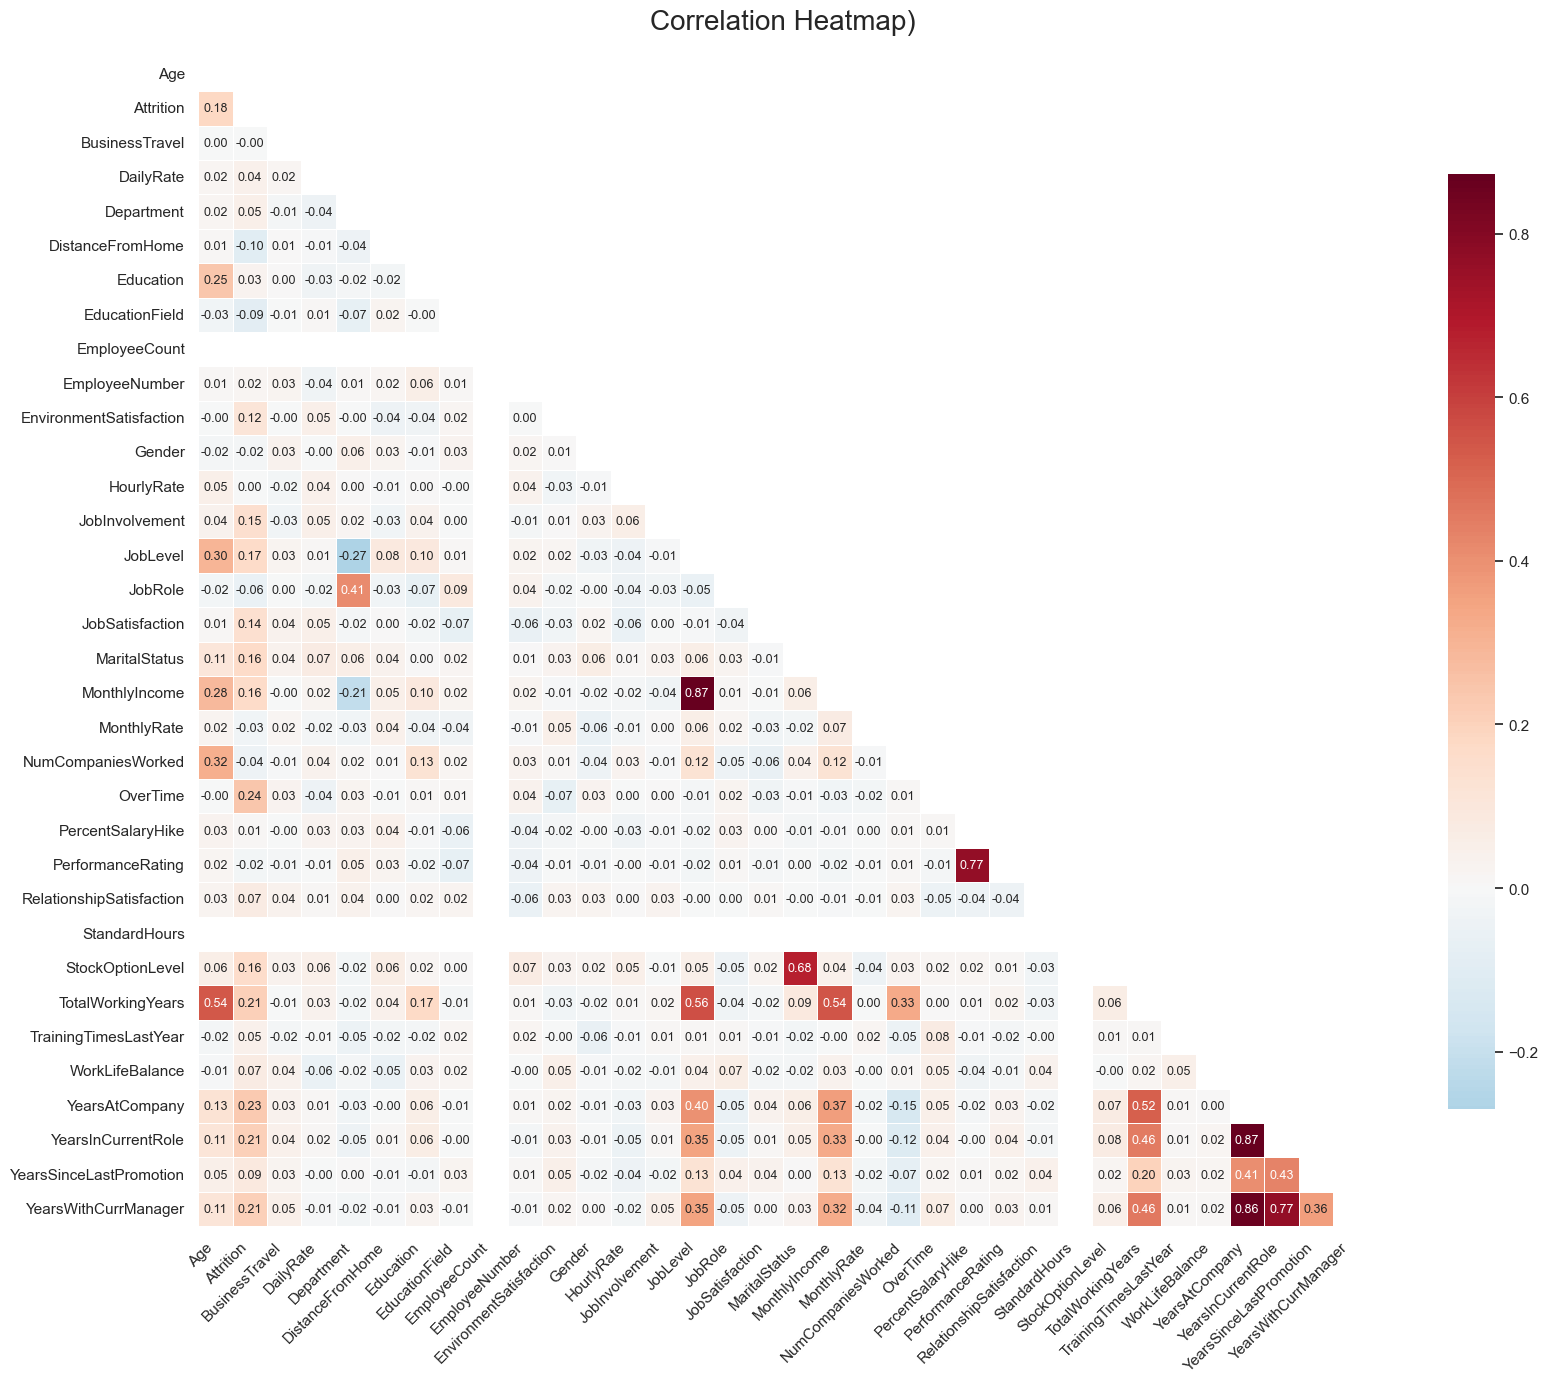

In [391]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(18, 14))
sns.set(style="white") 

heatmap = sns.heatmap(
    corr,                
    mask=mask,           
    annot=True,     
    fmt=".2f",
    cmap="RdBu_r",     
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 9},
    square=True
)

plt.title("Correlation Heatmap)", fontsize=20, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

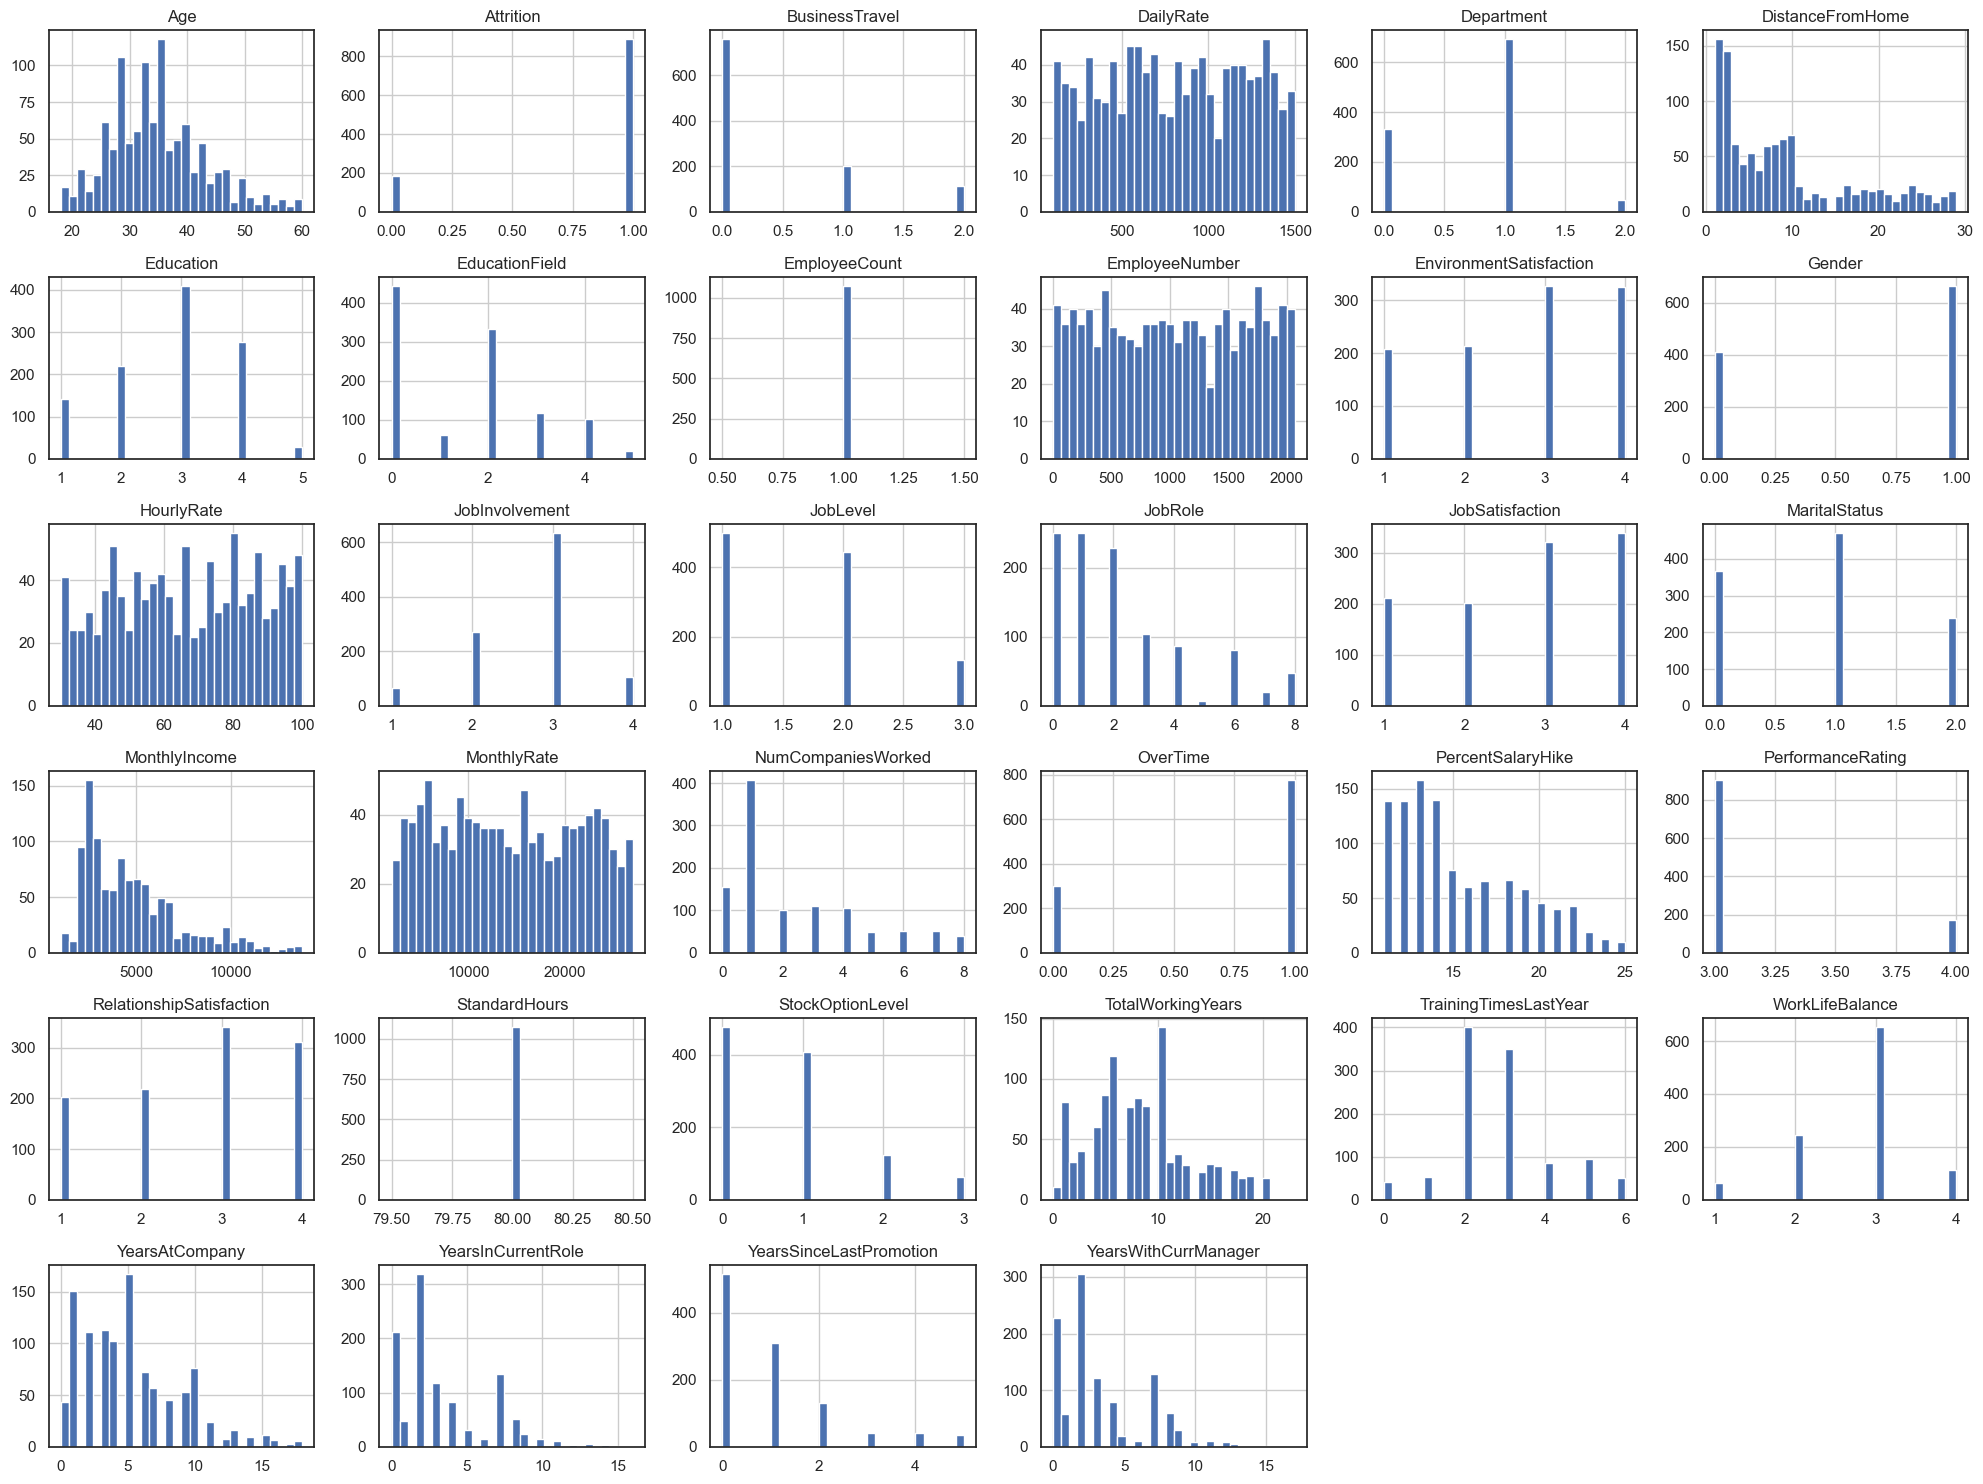

In [392]:
df.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

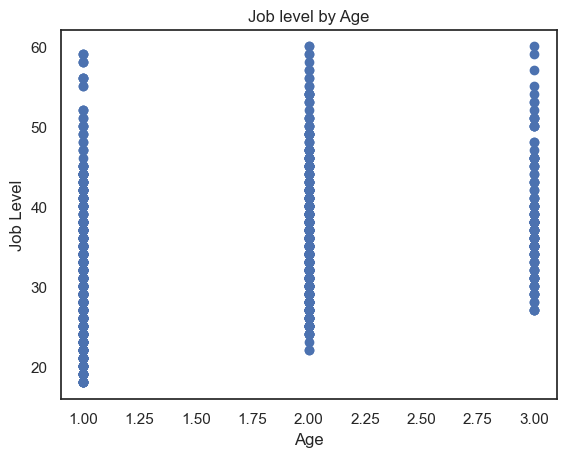

In [393]:
plt.scatter(df['JobLevel'], df['Age'],  marker="o", picker=True)
plt.title(f'Job level by Age')
plt.xlabel('Age')
plt.ylabel('Job Level')
plt.show()

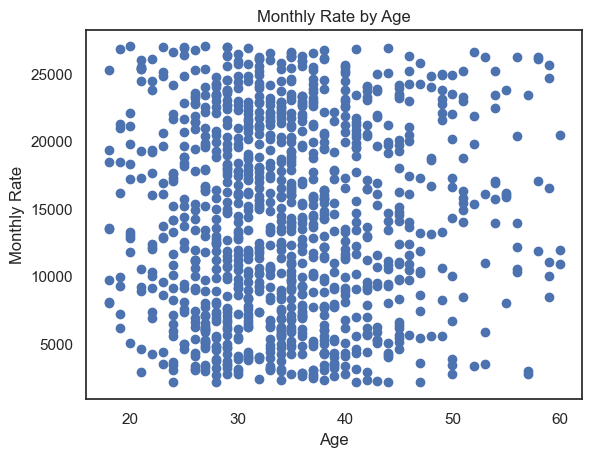

In [394]:
plt.scatter(df['Age'], df['MonthlyRate'],  marker="o", picker=True)
plt.title(f'Monthly Rate by Age')
plt.xlabel('Age')
plt.ylabel('Monthly Rate')
plt.show()

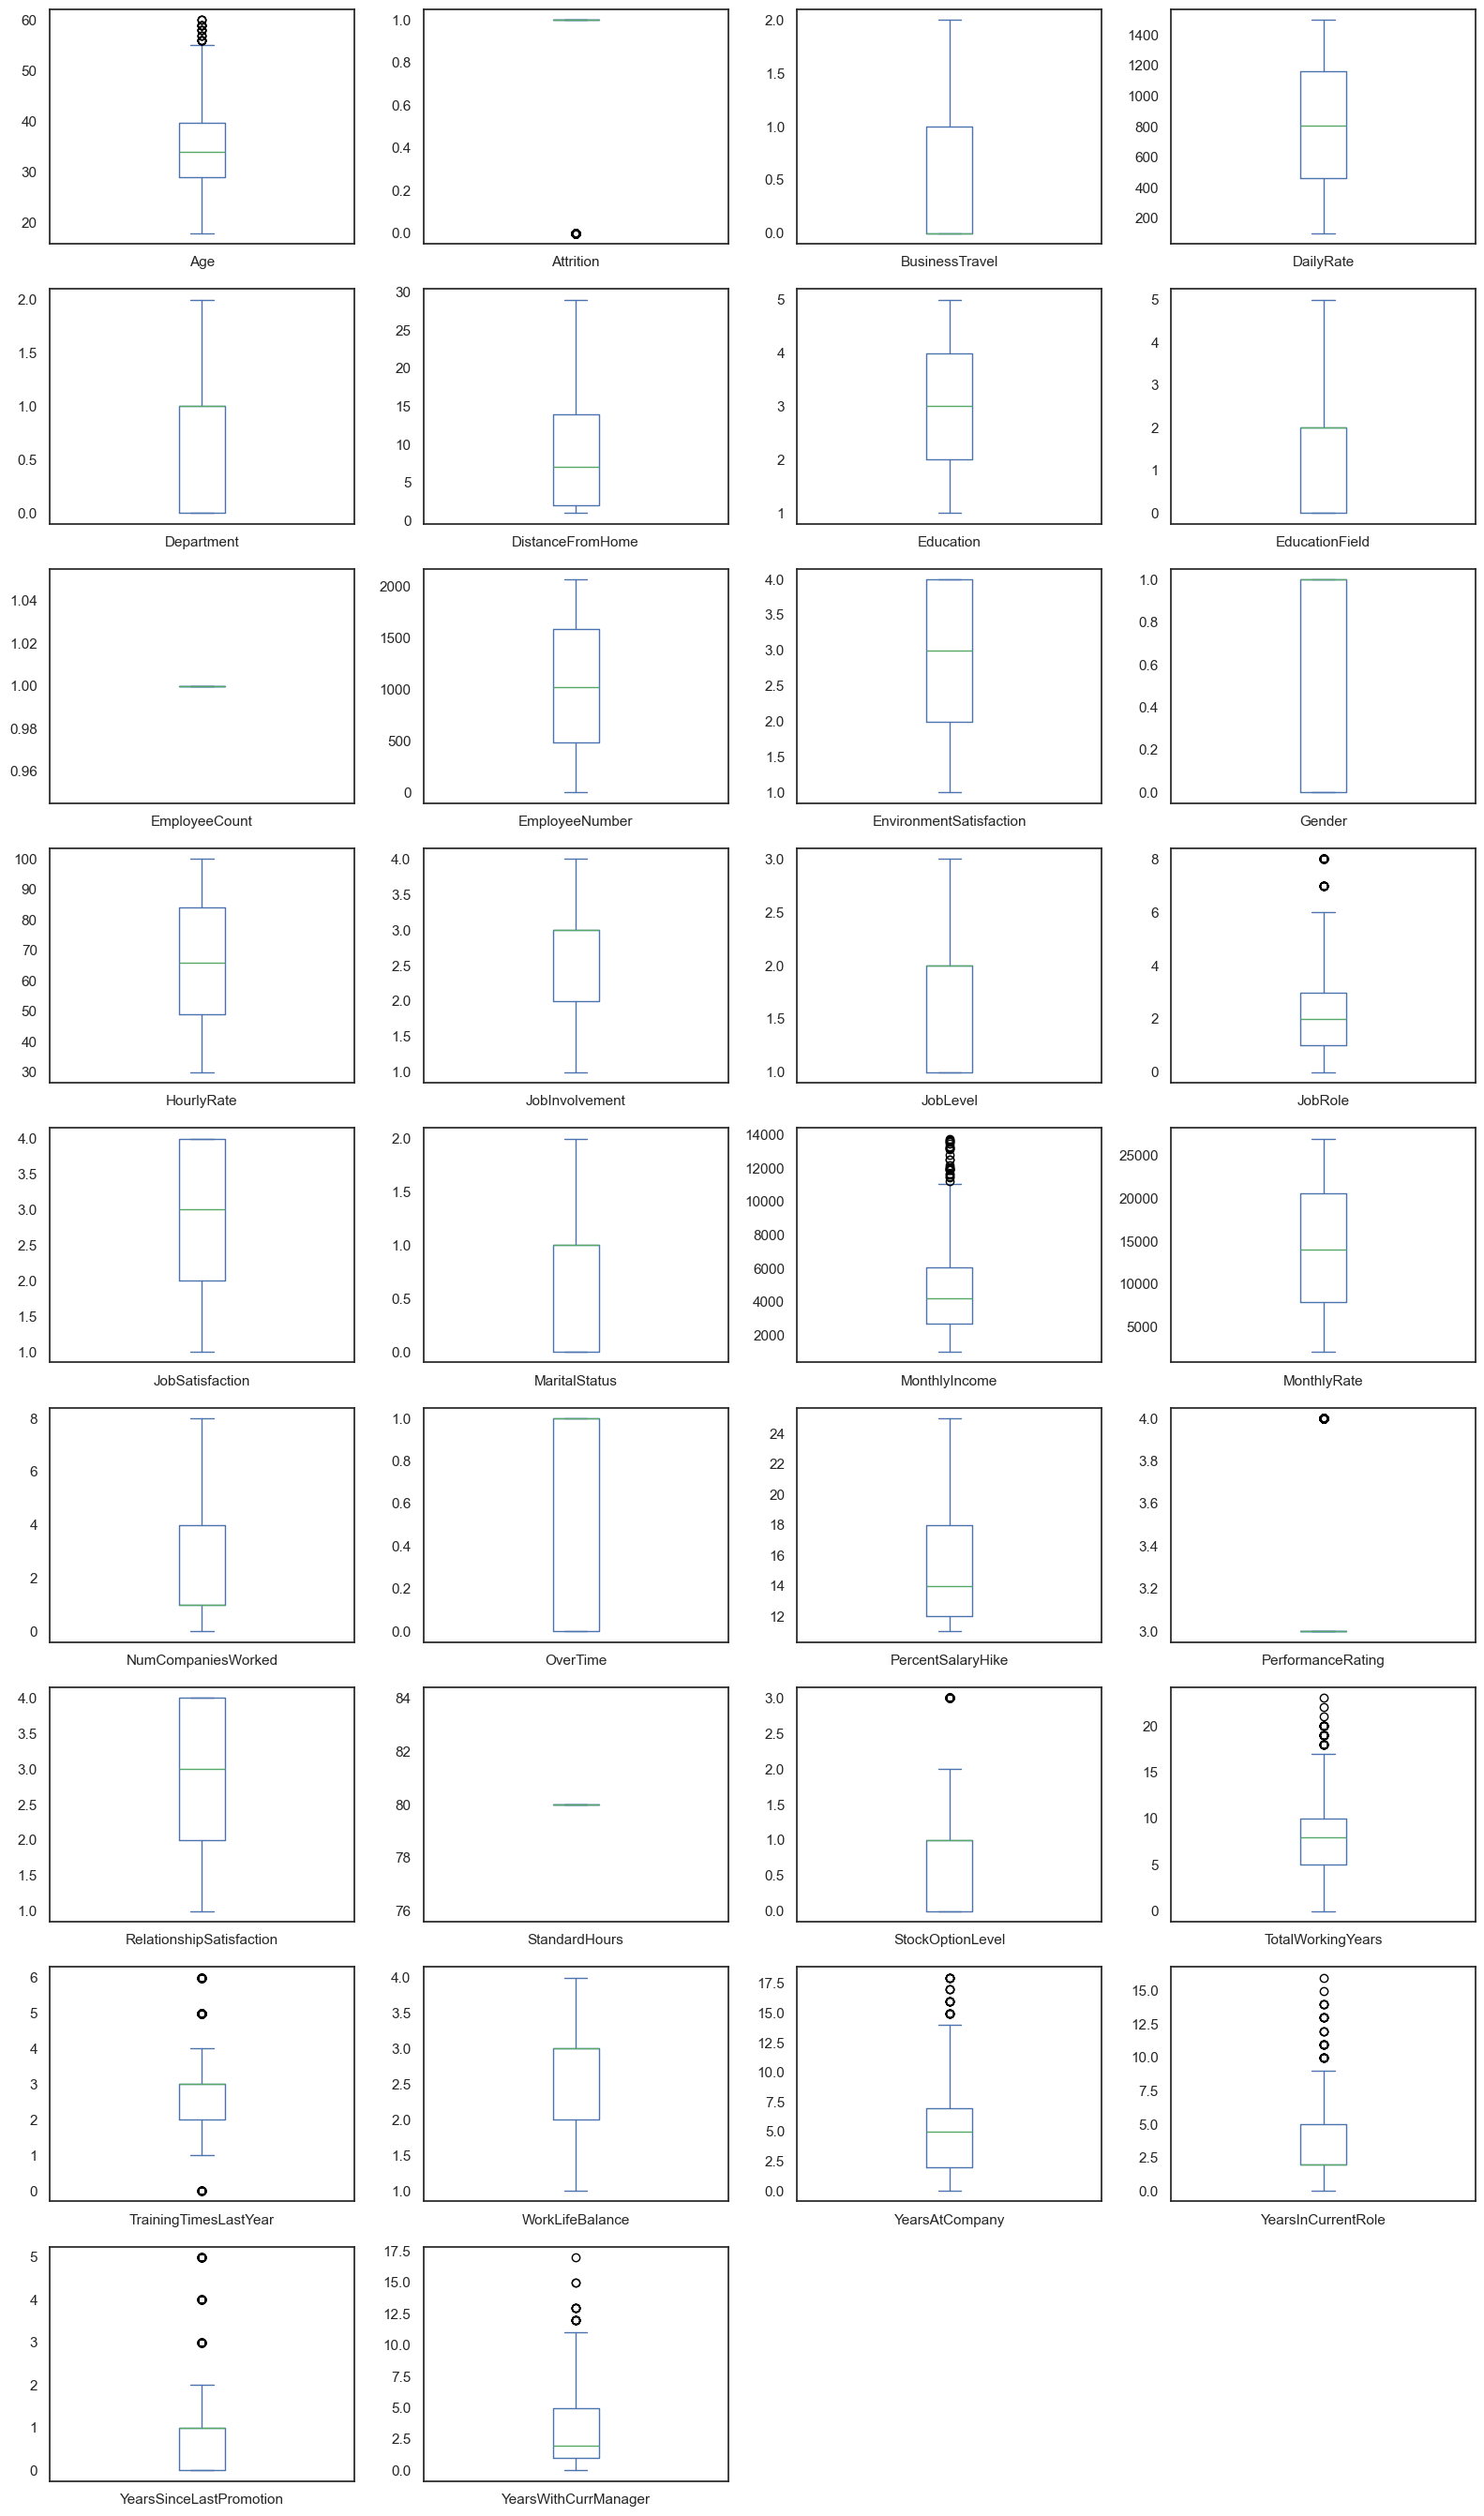

In [401]:
import math

num_columns = len(df.columns)
cols = 4
rows = math.ceil(num_columns / cols)

df.plot(kind='box', subplots=True, layout=(rows, cols), figsize=(4 * cols, 3 * rows), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


In [396]:
array = df.values

X, y = array[:, :-1], array[:, -1]

class0 = np.array(X[y==0])
class1 = np.array(X[y==1])
class2 = np.array(X[y==2])
class3 = np.array(X[y==3])
class4 = np.array(X[y==4])

In [397]:
set_prop = 0.2

seed = 7

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=set_prop, random_state=seed)

In [398]:
params = {'max_depth': 5}
classifier = DecisionTreeClassifier(**params)
# classifier = RandomForestClassifier(n_estimators = 100, max_depth = 6)
 
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [399]:
import graphviz
dot_df = tree.export_graphviz(classifier, out_file=None, 
                         feature_names=df.columns[:33], class_names = True,        
                         filled=True, rounded=True, proportion = False,
                         special_characters=True) 

In [400]:
graph = graphviz.Source(dot_df)
graph.render("company") 

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

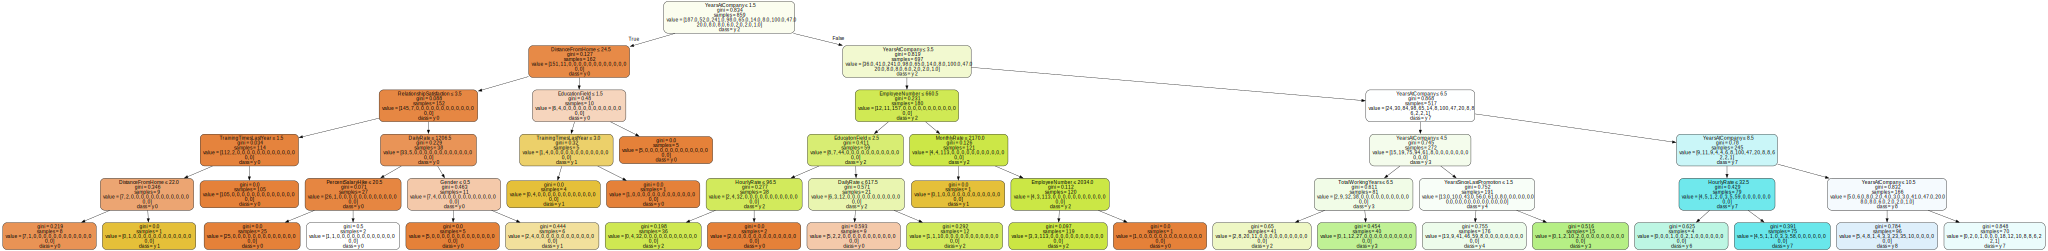

In [ ]:
graph

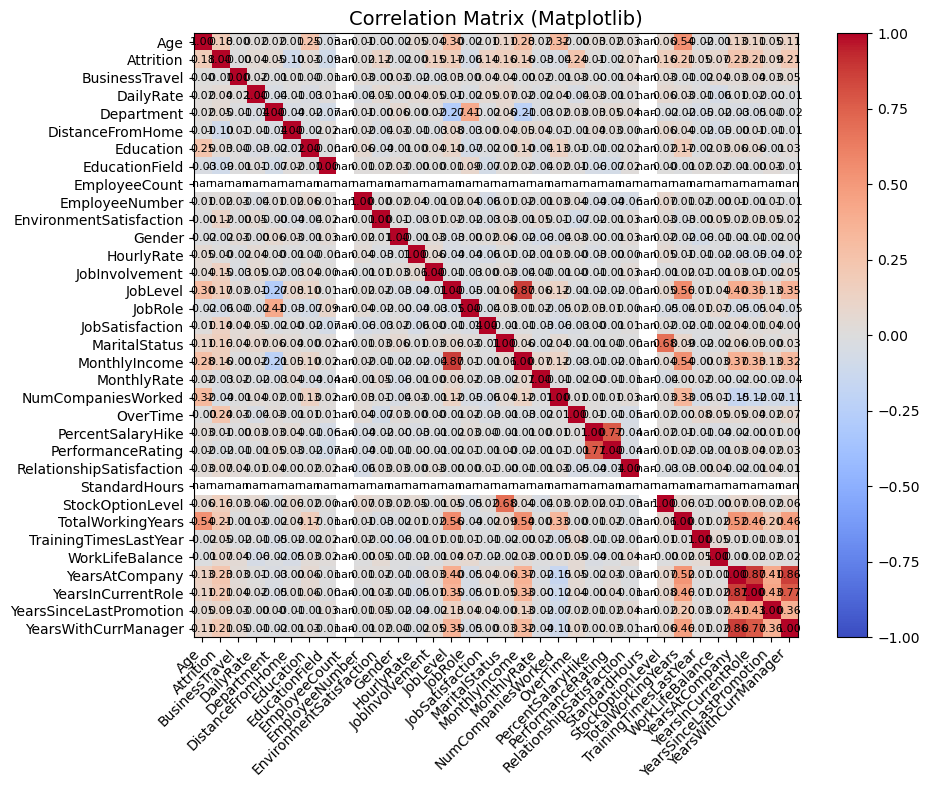

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)

# Add color bar
plt.colorbar()

# Add ticks and labels
plt.xticks(ticks=np.arange(len(corr.columns)), labels=corr.columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(corr.columns)), labels=corr.columns)

# Add values to each cell
ax = plt.gca()
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        ax.text(j, i, f"{corr.iloc[i, j]:.2f}",
                ha='center', va='center', color='black', fontsize=8)

plt.title('Correlation Matrix (Matplotlib)', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# Set the metrics
scoring = 'accuracy'

In [ ]:
# Predict the labels of the test df
y_testp = classifier.predict(X_test)
y_testp

array([0, 8, 2, 4, 0, 0, 8, 2, 8, 2, 0, 3, 0, 2, 3, 2, 7, 4, 7, 4, 0, 2,
       7, 2, 4, 0, 8, 7, 4, 8, 0, 3, 7, 2, 7, 0, 2, 2, 2, 8, 8, 4, 0, 7,
       4, 8, 4, 2, 8, 2, 3, 7, 2, 8, 2, 2, 4, 2, 2, 4, 4, 3, 8, 0, 3, 7,
       2, 3, 4, 4, 4, 4, 4, 7, 0, 8, 7, 3, 7, 2, 2, 7, 0, 3, 3, 2, 8, 2,
       8, 4, 2, 4, 0, 2, 7, 4, 4, 7, 4, 8, 2, 4, 2, 4, 4, 2, 7, 7, 2, 8,
       8, 7, 7, 7, 4, 8, 3, 8, 0, 8, 7, 0, 8, 8, 7, 7, 2, 2, 0, 3, 7, 2,
       0, 4, 0, 3, 8, 1, 2, 4, 0, 0, 4, 2, 0, 4, 2, 0, 2, 7, 0, 0, 8, 2,
       2, 3, 7, 8, 2, 2, 2, 8, 7, 7, 8, 4, 4, 2, 7, 4, 4, 1, 2, 4, 4, 7,
       0, 4, 2, 8, 2, 2, 7, 8, 7, 2, 7, 4, 2, 4, 0, 8, 0, 8, 0, 2, 0, 8,
       2, 4, 7, 0, 6, 0, 8, 0, 7, 2, 4, 4, 2, 7, 4, 4, 0])

In [ ]:
print ("Accuracy is ", accuracy_score(y_test,y_testp))

Accuracy is  0.5953488372093023


In [ ]:
confusion_mat = confusion_matrix(y_test,y_testp)
confusion_mat

array([[30,  1,  2,  2,  2,  0,  0,  2,  1,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  1,  2,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 4,  0, 48,  3,  8,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  7, 15,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1, 12,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1, 19,  9,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1, 11,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  8,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0]])

In [ ]:
confusion = pandas.crosstab(y_test,y_testp)
confusion

col_0,0,1,2,3,4,6,7,8
row_0,,,,,,,,
0,30,1,2,2,2,0,2,1
1,0,1,1,1,2,0,1,0
2,4,0,48,3,8,0,1,0
3,0,0,1,7,15,0,0,1
4,0,0,0,1,12,0,0,1
5,0,0,0,0,4,0,0,1
6,0,0,0,0,0,0,2,1
7,0,0,0,0,0,1,19,9
8,0,0,0,0,0,0,1,11


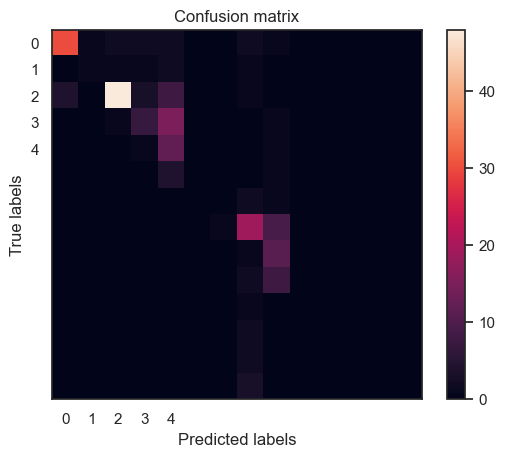

In [ ]:
# Visualize confusion matrix
plt.imshow(confusion_mat, interpolation='nearest')
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(5)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

<Axes: >

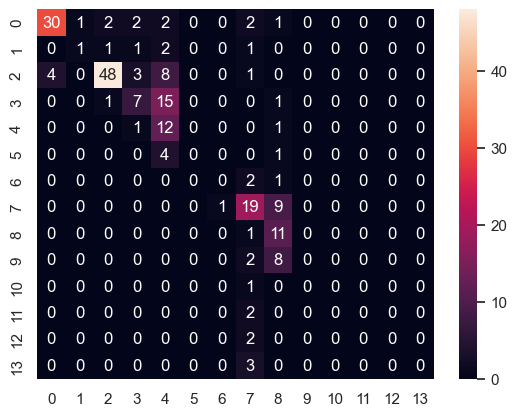

In [ ]:
import seaborn as sns
sns.heatmap(confusion_mat, annot=True)

In [ ]:
labels = sorted(np.unique(y_train))
class_names = [f'Class{i}' for i in labels]

print(classification_report(
    y_train,
    classifier.predict(X_train),
    labels=labels,
    target_names=class_names,
    zero_division=0  
))

              precision    recall  f1-score   support

      Class0       0.96      0.84      0.90       187
      Class1       0.83      0.19      0.31        52
      Class2       0.84      0.73      0.78       241
      Class3       0.67      0.38      0.48        98
      Class4       0.34      0.91      0.49        65
      Class5       0.00      0.00      0.00        14
      Class6       0.50      0.25      0.33         8
      Class7       0.52      0.76      0.62       100
      Class8       0.36      0.74      0.49        47
      Class9       0.00      0.00      0.00        20
     Class10       0.00      0.00      0.00         8
     Class11       0.00      0.00      0.00         8
     Class12       0.00      0.00      0.00         6
     Class13       0.00      0.00      0.00         2
     Class15       0.00      0.00      0.00         2
     Class17       0.00      0.00      0.00         1

    accuracy                           0.64       859
   macro avg       0.31   

In [ ]:
labels = sorted(np.unique(y_test))
class_names = [f'Class{i}' for i in labels]

print(classification_report(
    y_test,
    classifier.predict(X_test),
    labels=labels,
    target_names=class_names,
    zero_division=0  
))

              precision    recall  f1-score   support

      Class0       0.88      0.75      0.81        40
      Class1       0.50      0.17      0.25         6
      Class2       0.92      0.75      0.83        64
      Class3       0.50      0.29      0.37        24
      Class4       0.28      0.86      0.42        14
      Class5       0.00      0.00      0.00         5
      Class6       0.00      0.00      0.00         3
      Class7       0.53      0.66      0.58        29
      Class8       0.33      0.92      0.49        12
      Class9       0.00      0.00      0.00        10
     Class10       0.00      0.00      0.00         1
     Class11       0.00      0.00      0.00         2
     Class12       0.00      0.00      0.00         2
     Class13       0.00      0.00      0.00         3

    accuracy                           0.60       215
   macro avg       0.28      0.31      0.27       215
weighted avg       0.62      0.60      0.58       215



In [ ]:
df[['YearsAtCompany', 'MonthlyIncome', 'HourlyRate', 'MonthlyRate', 'DailyRate']].corr()

MonthlyIncome  HourlyRate  DailyRate
0           5993          94       1102
1           5130          61        279
2           2090          92       1373
3           2909          56       1392
5           3068          79       1005

In [ ]:
corr = df.corr()['MonthlyIncome'].sort_values(ascending=False)
print(corr)

MonthlyIncome               1.000000
JobLevel                    0.869368
TotalWorkingYears           0.542708
YearsAtCompany              0.366335
YearsInCurrentRole          0.329167
YearsWithCurrManager        0.319620
Age                         0.279494
Attrition                   0.163596
YearsSinceLastPromotion     0.129862
NumCompaniesWorked          0.122775
Education                   0.095033
MonthlyRate                 0.074515
MaritalStatus               0.056217
DistanceFromHome            0.053343
StockOptionLevel            0.042727
WorkLifeBalance             0.033560
EmployeeNumber              0.023367
EducationField              0.021094
DailyRate                   0.020581
JobRole                     0.014520
TrainingTimesLastYear      -0.002963
BusinessTravel             -0.004868
JobSatisfaction            -0.005380
EnvironmentSatisfaction    -0.007414
PercentSalaryHike          -0.009537
RelationshipSatisfaction   -0.010843
HourlyRate                 -0.015309
G

In [ ]:
corr = df.corr()['YearsAtCompany'].sort_values(ascending=False)
print(corr)

YearsAtCompany              1.000000
YearsInCurrentRole          0.873244
YearsWithCurrManager        0.861552
TotalWorkingYears           0.520484
YearsSinceLastPromotion     0.405136
JobLevel                    0.397714
MonthlyIncome               0.366335
Attrition                   0.226983
Age                         0.129891
StockOptionLevel            0.073445
MaritalStatus               0.058126
Education                   0.057085
OverTime                    0.048984
JobSatisfaction             0.039181
BusinessTravel              0.033877
JobInvolvement              0.032199
PerformanceRating           0.030925
EnvironmentSatisfaction     0.022019
TrainingTimesLastYear       0.013940
EmployeeNumber              0.010474
DailyRate                   0.006956
WorkLifeBalance             0.004991
DistanceFromHome           -0.001540
EducationField             -0.006103
Gender                     -0.014628
PercentSalaryHike          -0.015245
RelationshipSatisfaction   -0.017487
M

In [423]:
feature_cols = ['JobLevel', 'TotalWorkingYears']

X = df[feature_cols]

# print the first 5 rows
X.head()

,JobLevel,TotalWorkingYears
0,2,8
1,2,10
2,1,7
3,1,8
5,1,8


In [424]:
y = df['MonthlyIncome']

# print the first 5 values
y.head()

0    5993
1    5130
2    2090
3    2909
5    3068
Name: MonthlyIncome, dtype: int64

In [425]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(1074, 2)


In [426]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(1074,)


In [427]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [428]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(805, 2)
(805,)
(269, 2)
(269,)


In [429]:
y_test.head()

871     2210
589     2319
69      3388
272     2070
1376    4771
Name: MonthlyIncome, dtype: int64

In [430]:
X_test.head()

,JobLevel,TotalWorkingYears
871,1,1
589,1,1
69,1,2
272,1,5
1376,1,10


In [431]:
# create a model
linreg = LinearRegression()

# fit the model to our training df
linreg.fit(X_train, y_train)

LinearRegression()

In [432]:
print('b0 =', linreg.intercept_)
print('bi =', linreg.coef_)

b0 = -781.0428907853338
bi = [3109.77612537   46.82455678]


In [433]:
list(zip(feature_cols, linreg.coef_))

[('JobLevel', 3109.7761253732706), ('TotalWorkingYears', 46.824556779321185)]

In [434]:
y_test.head()

871     2210
589     2319
69      3388
272     2070
1376    4771
Name: MonthlyIncome, dtype: int64

In [435]:
y_predicted = linreg.predict(X_test)

In [436]:
y_predicted

array([2375.55779137, 2375.55779137, 2422.38234815, 2562.85601848,
       2796.97880238, 2375.55779137, 2656.50513204, 9578.42573448,
       2375.55779137, 5859.93037098, 5953.57948453, 5859.93037098,
       2562.85601848, 2703.32968882, 5859.93037098, 5625.80758708,
       2328.73323459, 2796.97880238, 5766.28125742, 9016.53105313,
       6094.05315487, 6140.87771165, 2516.03146171, 2328.73323459,
       8969.70649635, 2609.68057526, 2562.85601848, 2469.20690493,
       2422.38234815, 6234.52682521, 2609.68057526, 8969.70649635,
       9531.6011777 , 3171.57525662, 2609.68057526, 6140.87771165,
       2796.97880238, 2703.32968882, 5859.93037098, 6140.87771165,
       5906.75492775, 2609.68057526, 2937.45247272, 5719.45670064,
       5813.1058142 , 5672.63214386, 2375.55779137, 9297.4783938 ,
       2375.55779137, 3218.3998134 , 5859.93037098, 5766.28125742,
       5719.45670064, 5906.75492775, 3031.10158628, 2469.20690493,
       5906.75492775, 5906.75492775, 5719.45670064, 2375.55779

In [437]:
from sklearn import metrics

In [438]:
print(metrics.mean_absolute_error(y_test, y_predicted))

934.0011619758222


In [439]:
print(metrics.mean_squared_error(y_test, y_predicted))

1638009.9763740038


In [440]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

1279.847637953051


In [441]:
eV = round(sm.explained_variance_score(y_test, y_predicted), 2)
print('Explained variance score ',eV )

Explained variance score  0.74


In [442]:
r2_score(y_test, y_predicted)

0.7404345111672159

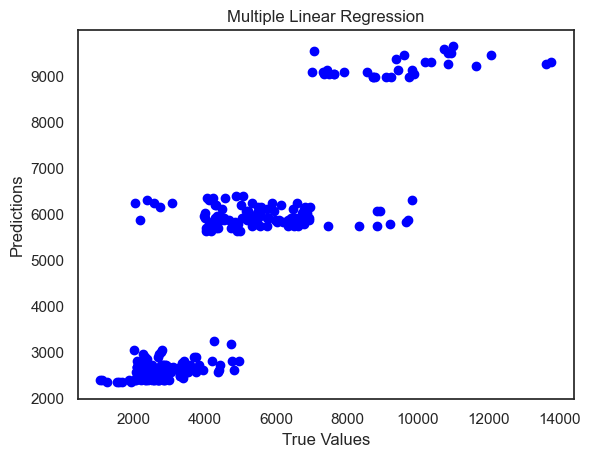

In [443]:
# Visualise the regression results
plt.title('Multiple Linear Regression')
plt.scatter(y_test, y_predicted, color='blue')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()